<a href="https://colab.research.google.com/github/krec7748/DeepLearning_Study/blob/main/CH04_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Datasets

### 1. Dataset for Regression

In [4]:
import tensorflow as tf

N, n_feature = 8, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

X = tf.random.normal(mean = 0, stddev = 1, shape = (N, n_feature))
Y = tf.reduce_sum(X * t_weights, axis = 1) + t_bias

print("X(shape/dtype/data: {} / {}\n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data: {} / {}\n{}\n".format(Y.shape, Y.dtype, Y.numpy()))

X(shape/dtype/data: (8, 5) / <dtype: 'float32'>
[[-1.250284   -0.6487677  -0.71603507  1.1050797  -0.6174603 ]
 [ 1.3354805   0.97403085 -0.35074976  0.46178842  1.8921834 ]
 [ 0.77866435 -1.558661    1.0681812  -0.6251609  -0.5735787 ]
 [-2.3574576  -0.19194466  0.5620251  -0.1495134   2.308006  ]
 [ 0.33949533  1.4311163   0.13812031 -0.5879801  -0.13479772]
 [ 0.2522798  -0.6428541  -1.8108578  -0.46418732 -1.0871072 ]
 [ 0.6031912   0.6426342  -1.1054391  -1.3549364   1.2770388 ]
 [-0.6240641  -0.0876119  -1.0509317   0.4284316  -0.92646706]]

Y(shape/dtype/data: (8,) / <dtype: 'float32'>
[ 6.6370926 23.539364   5.497349  19.886705  10.59018   -3.7582874
  9.537591   3.1293082]



### 2. Dataset for Binary Classification

In [5]:
import tensorflow as tf

N, n_feature = 8, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

X = tf.random.normal(mean = 0, stddev = 1, shape = (N, n_feature))
Y = tf.reduce_sum(X * t_weights, axis = 1) + t_bias
Y_b = tf.cast(Y > 5, tf.int32) #tf.cast: datatype을 바꾸어줌. (여기서는 boolen > int32)

print("X(shape/dtype/data: {} / {}\n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data: {} / {}\n{}\n".format(Y.shape, Y.dtype, Y.numpy()))
print("Y_binary(shape/dtype/data: {} / {}\n{}\n".format(Y_b.shape, Y_b.dtype, Y_b.numpy()))

X(shape/dtype/data: (8, 5) / <dtype: 'float32'>
[[ 0.47715846 -0.56015086  0.24968106  0.03156044  0.69933426]
 [-0.43770796  0.17755486  0.82322246  1.2974149   0.50151896]
 [-1.6614627   0.60517865 -0.07507582 -0.8327584  -0.4580765 ]
 [-0.91608024 -0.90811133 -0.00438176  1.0299528   1.2576612 ]
 [-0.74195623  0.24170269 -0.01156597  0.80887896 -0.20795722]
 [ 0.7311476  -0.35025355  0.54567873 -0.29435772  0.4039447 ]
 [ 1.7860504   0.19312778 -1.3761576  -1.5237675   1.3149248 ]
 [ 0.675263    1.1004834  -0.2807703  -1.2195137  -0.9916829 ]]

Y(shape/dtype/data: (8,) / <dtype: 'float32'>
[13.728813  20.084324   3.7022505 17.66267   11.902481  12.50997
  8.523387   2.1974497]

Y_binary(shape/dtype/data: (8,) / <dtype: 'int32'>
[1 1 0 1 1 1 1 0]



### 3. Dataset for Multi-class Classification

X(shape/dtype/data: (24, 2) / <dtype: 'float32'>
[[ 11.475074    -4.0365715 ]
 [ 10.814414    -4.631461  ]
 [ 11.561847    -4.373259  ]
 [ 11.504583    -5.7109756 ]
 [ 11.316931    -6.4582515 ]
 [ 10.963577    -2.9651327 ]
 [ 11.341058    -3.1089087 ]
 [ 11.974572    -4.871673  ]
 [ -7.1695027   -0.4196735 ]
 [ -7.567725    -1.7680057 ]
 [ -8.792506    -0.94778794]
 [ -5.992324     0.5212157 ]
 [ -7.5467324    0.87877536]
 [ -6.8562775    0.17267668]
 [ -7.925321    -3.0344453 ]
 [ -8.553035    -0.71151555]
 [ -9.437509   -14.843956  ]
 [ -6.5094943  -13.378238  ]
 [ -7.6473293  -15.018809  ]
 [ -7.955691   -15.32201   ]
 [ -9.491535   -15.130469  ]
 [-10.239123   -14.418268  ]
 [ -7.4006243  -15.249985  ]
 [ -9.449647   -13.806467  ]]

Y(shape/dtype/data: (24, 1) / <dtype: 'int32'>
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]



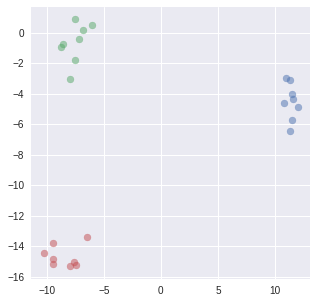

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt

N, n_feature = 8, 2
n_class = 3

#데이터셋 (X, Y) 변수 생성
X = tf.zeros(shape = (0, n_feature))
Y = tf.zeros(shape = (0, 1), dtype = tf.int32)

#시각화 설정
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (5, 5))

for class_idx in range(n_class):
    #임의의 중심점 벡터설정
    center = tf.random.uniform(minval = -15,  maxval = 15, shape = (2, ))

    #중심점 주변으로 임의의 데이터 생성
    x1 = center[0] + tf.random.normal(shape = (N, 1)) #shape: (N, 1)
    x2 = center[1] + tf.random.normal(shape = (N, 1)) #shape: (N, 1)

    #생성한 데이터들을 묶음
    x = tf.concat((x1, x2), axis = 1) #shape: (N, 2)

    #데이터들의 클래스 설정
    y = class_idx * tf.ones(shape = (N, 1), dtype = tf.int32) #shape: (N, 1)

    #시각화
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha = 0.5)

    #데이터 셋에 담기
    X = tf.concat((X, x), axis = 0)
    Y = tf.concat((Y, y), axis = 0)
    
#Confirm
print("X(shape/dtype/data: {} / {}\n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data: {} / {}\n{}\n".format(Y.shape, Y.dtype, Y.numpy()))

### 4. Dataset for Multi-class Classification with One-hot Encoding

X(shape/dtype/data: (24, 2) / <dtype: 'float32'>
[[ -1.1257721  -10.728225  ]
 [  2.0492244  -10.237036  ]
 [  1.0775546  -11.225157  ]
 [  1.924815   -11.5197115 ]
 [  0.36057758 -10.595751  ]
 [ -0.57063127 -12.528351  ]
 [  0.33080918 -10.099607  ]
 [  0.19839913 -13.223125  ]
 [  4.388907    -6.529095  ]
 [  5.410236    -4.938502  ]
 [  6.8995433   -6.353146  ]
 [  6.2825265   -8.622751  ]
 [  4.4679346   -6.186336  ]
 [  6.1500072   -7.569845  ]
 [  5.9072504   -6.556487  ]
 [  3.7504761   -5.9712214 ]
 [-12.417862   -12.78781   ]
 [-13.102141    -9.807152  ]
 [-14.379223   -10.0119    ]
 [-12.723747   -12.418128  ]
 [-13.29563    -11.655244  ]
 [-13.918744   -12.873541  ]
 [-13.870561   -10.846468  ]
 [-13.287624   -12.849361  ]]

Y(shape/dtype/data: (24, 3) / <dtype: 'int32'>
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]

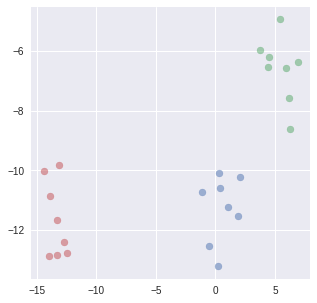

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

N, n_feature = 8, 2
n_class = 3

#데이터셋 (X, Y) 변수 생성
X = tf.zeros(shape = (0, n_feature))
Y = tf.zeros(shape = (0, ), dtype = tf.int32) #Vector 형태로 만들어 주어야 함. (One hot vector)

#시각화 설정
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (5, 5))

for class_idx in range(n_class):
    #임의의 중심점 벡터설정
    center = tf.random.uniform(minval = -15,  maxval = 15, shape = (2, ))

    #중심점 주변으로 임의의 데이터 생성
    x1 = center[0] + tf.random.normal(shape = (N, 1)) #shape: (N, 1)
    x2 = center[1] + tf.random.normal(shape = (N, 1)) #shape: (N, 1)

    #생성한 데이터들을 묶음
    x = tf.concat((x1, x2), axis = 1) #shape: (N, 2)

    #데이터들의 클래스 설정
    y = class_idx * tf.ones(shape = (N, ), dtype = tf.int32) #Vector 형태로 만들어 주어야 함. (One hot vector)

    #시각화
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha = 0.5)

    #데이터 셋에 담기
    X = tf.concat((X, x), axis = 0)
    Y = tf.concat((Y, y), axis = 0)

#One hot encoding
Y = tf.one_hot(Y, depth = n_class, dtype = tf.int32)

#Confirm
print("X(shape/dtype/data: {} / {}\n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data: {} / {}\n{}\n".format(Y.shape, Y.dtype, Y.numpy()))

### 5. Dataset Objects

In [55]:
import tensorflow as tf

N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1, 2, 3 ,4 ,5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

X = tf.random.normal(mean = 0, stddev = 1, shape = (N, n_feature))
Y = tf.reduce_sum(X * t_weights, axis = 1) + t_bias

#데이터셋 Object 생성
dataset = tf.data.Dataset.from_tensor_slices((X, Y)) #데이터가 간단하고 size가 작을 때 쓰는 방법

#Batch, shuffle 적용
dataset = dataset.batch(batch_size).shuffle(1)

#확인
for x, y in dataset:
    print(x.shape, y.shape)

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)


## 2. Mean Squared Error

### 1. MSE Calculation

In [10]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

#Set batch_size
batch_size = 32

#Set loss function
loss_object = MeanSquaredError()

#Set label, prediction data
labels = tf.random.normal(shape = (batch_size, 1))
predictions = tf.random.normal(shape = (batch_size , 1)) #마지막 Layer의 뉴런 수는 1개 이므로 shape = (?, 1)

#Get mse
mse_func = loss_object(labels, predictions)
mse_manual = tf.reduce_mean(tf.math.pow(labels - predictions, 2))

#Confirm
print("MSE(Tensorflow): ", mse_func.numpy())
print("MSE(Manual): ", mse_manual.numpy())

MSE(Tensorflow):  1.6916766
MSE(Manual):  1.6916766


### 2. MSE with Model/Dataset

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

#Set N, n_feature, batch_size
N, n_feature = 100, 5
batch_size = 32

#Create data
X = tf.random.normal(shape = (N, n_feature))
Y = tf.random.normal(shape = (N, 1))

#Create dataset
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

#Set Model, Loss function
model = Dense(units = 1, activation = "linear")
loss_object = MeanSquaredError()

#Confirm
for x, y in dataset:
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

2.164154
1.9735975
2.951359
1.1400383


## 3. Binary Cross Entropy

### 1. BCE Calculation

In [20]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy

#Set batch_size, number of classes
batch_size = 32
n_class = 2 #binary

#Set label, prediction data
labels = tf.random.uniform(shape = (batch_size, 1),
                           minval = 0, maxval = 2,
                           dtype = tf.int32)

predictions = tf.random.uniform(shape = (batch_size, 1),
                                minval = 0, maxval = 1,
                                dtype = tf.float32)

#Set loss function
loss_object = BinaryCrossentropy()

#Get bce (Tensorflow)
bce_tf = loss_object(labels, predictions)

#Get bce (Manual)
labels = tf.cast(labels, dtype = tf.float32)
bce_manual = - (labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))
bce_manual = tf.reduce_mean(bce_manual)

#Confirm
print("BCE(Tensorflow): ", bce_tf.numpy())
print("BCE(Manual): ", bce_manual.numpy())

BCE(Tensorflow):  0.86497915
BCE(Manual):  0.8649796


### 2. BCE with Model/Dataset

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

#Set N, n_feature, batch_size
N, n_feature = 100, 5
batch_size = 32

#Set weights, bias
t_weights = tf.constant([1, 2, 3, 4, 5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

#Create data
X = tf.random.normal(mean = 0, stddev = 1, shape = (N, n_feature))
Y = tf.reduce_sum(X * t_weights, axis = 1) + t_bias
Y = tf.cast(Y > 5 , dtype = tf.int32) #To get binary label

#Create dataset
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

#Set model, loss function
model = Dense(units = 1, activation = "sigmoid")
loss_object = BinaryCrossentropy()

#Confirm
for x, y in dataset:
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

0.6593415
0.64507127
0.6619818
0.8874003


## 4. Sparse Categorical Cross Entropy

### 1. SCCE Calculation

In [28]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy

#Set batch_size, number of class
batch_size, n_class = 16, 5

#Set label, prediction data
labels = tf.random.uniform(shape = (batch_size, ),
                           minval = 0, maxval = n_class, dtype = tf.int32)

predictions = tf.random.uniform(shape = (batch_size, n_class),
                                minval = 0, maxval = 1, dtype = tf.float32)
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis = 1), (-1, 1)) #shape : (original, 1)
predictions = predictions / pred_sum # predictions의 각 row들의 원소의 합은 1이 되어야 함.

#Get scce (Tensorflow)
loss_object = SparseCategoricalCrossentropy()
scce_tf = loss_object(labels, predictions)

#Get scce (Manual)
scce_manual = 0
for label, prediction in zip(labels, predictions):
    scce_manual += -tf.math.log(prediction[label])
scce_manual /= batch_size

#Confirm
print("SCCE(Tensorflow): ", scce_tf.numpy())
print("SCCE(Manual): ", scce_manual.numpy())

SCCE(Tensorflow):  2.489929
SCCE(Manual):  2.4899292


### 2. SCCE with Model/Dataset

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

#Set N, n_feature, number of class, batch_size
N, n_feature = 100, 2
n_class = 5
batch_size = 32

#Create data
X = tf.zeros(shape = (0, n_feature))
Y = tf.zeros(shape = (0, 1), dtype = tf.int32)

for class_idx in range(n_class):
    center = tf.random.uniform(shape = (2, ), minval = -15, maxval = 15)

    x1 = center[0] + tf.random.normal(shape = (N, 1))
    x2 = center[1] + tf.random.normal(shape = (N, 1))

    x = tf.concat((x1, x2), axis = 1)
    y = class_idx * tf.ones(shape = (N, 1), dtype = tf.int32)

    X = tf.concat((X, x), axis = 0)
    Y = tf.concat((Y, y), axis = 0)

#Create dataset
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

#Set model, loss function
model = Dense(units = n_class, activation = "softmax")
loss_object = SparseCategoricalCrossentropy()

#Confirm
for x, y in dataset:
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

19.464123
19.886187
19.430119
11.166124
9.840818
9.927541
10.647233
10.791934
10.740932
9.997108
9.76137
9.602
21.805172
32.849167
32.14038
32.660744


## 5. Categorical Cross Entropy

### 1. CCE Calculation

In [36]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

#Set batch_size, number of class
batch_size, n_class = 16, 5

#Set labels
labels = tf.random.uniform(shape = (batch_size, ),
                           minval = 0, maxval = n_class, dtype = tf.int32)

labels = tf.one_hot(labels, n_class)

#Set predictions
predictions = tf.random.uniform(shape = (batch_size, n_class),
                                minval = 0, maxval = 1, dtype = tf.float32)
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis = 1), (-1, 1)) #shape : (original, 1)
predictions = predictions / pred_sum

#Get cce (Tensorflow)
loss_object = CategoricalCrossentropy()
cce_tf = loss_object(labels, predictions)

#Get cce (Manual)
cce_manual = tf.reduce_mean(tf.reduce_sum(-labels * tf.math.log(predictions), axis = 1))

#Confirm
print("CCE(Tensorflow): ", cce_tf.numpy())
print("CCE(Manual): ", cce_manual.numpy())

CCE(Tensorflow):  1.9229697
CCE(Manual):  1.9229697


### 2. CCE with Model/Dataset

In [21]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

#Set N, n_feature, number of class, batch_size
N, n_feature = 64, 2
n_class = 5
batch_size = 32

#Create data
X = tf.zeros(shape = (0, n_feature))
Y = tf.zeros(shape = (0, ), dtype = tf.int32) #vector

for class_idx in range(n_class):
    center = tf.random.uniform(shape = (2, ), minval = -15, maxval = 15)

    x1 = center[0] + tf.random.normal(shape = (N, 1))
    x2 = center[1] + tf.random.normal(shape = (N, 1))

    x = tf.concat((x1, x2), axis = 1)
    y = class_idx * tf.ones(shape = (N, ), dtype = tf.int32) #vector

    X = tf.concat((X, x), axis = 0)
    Y = tf.concat((Y, y), axis = 0)

Y = tf.one_hot(Y, depth = n_class, dtype = tf.int32)

#Create dataset
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

#Set model/loss function
model = Dense(units = n_class, activation = "softmax")
loss_object = CategoricalCrossentropy()

#Confirm
for x, y in dataset:
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

4.3979483
4.584874
3.3998973
3.5025268
4.7090187
4.632175
1.1500043
1.1130182
3.709053
3.5024161
